<a href="https://colab.research.google.com/github/AGU1515/brain-tumor-classification/blob/main/Model_Development_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import sklearn
import tensorflow as tf
import matplotlib.image as mpimg


In [ ]:
# install the kaggle library
!pip install kaggle
# Make a directory named ".kaggle"
! mkdir ~/.kaggle
# Copy the "kaggle.json" into this new directory
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json
# Download the dataset from Kaggle
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri


# Unzip the data
!unzip brain-tumor-classification-mri.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 96% 83.0M/86.8M [00:01<00:00, 56.2MB/s]
100% 86.8M/86.8M [00:01<00:00, 62.5MB/s]
Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/

In [ ]:
no_tumor_test_path = '/content/Brain-Tumor-Classification/Testing/no_tumor'
glioma_test_path = '/content/Brain-Tumor-Classification/Testing/glioma_tumor'
meningioma_test_path = '/content/Brain-Tumor-Classification/Testing/meningioma_tumor'
pituitary_test_path = '/content/Brain-Tumor-Classification/Testing/pituitary_tumor'

no_tumor_train_path = '/content/Brain-Tumor-Classification/Training/no_tumor'
glioma_train_path = '/content/Brain-Tumor-Classification/Training/glioma_tumor'
meningioma_train_path = '/content/Brain-Tumor-Classification/Training/meningioma_tumor'
pituitary_train_path = '/content/Brain-Tumor-Classification/Training/pituitary_tumor'

no_tumor_test_image_data = []
glioma_test_image_data = []
meningioma_test_image_data = []
pituitary_test_image_data = []

no_tumor_train_image_data = []
glioma_train_image_data = []
meningioma_train_image_data = []
pituitary_train_image_data = []
img_size = (150, 150)

def load_and_normalize_images(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, img_size)
        # Normalize the image
        image = image / 255.0
        image_data.append(image)
    return np.array(image_data)

no_tumor_test_image_data = load_and_normalize_images(no_tumor_test_path)
glioma_test_image_data = load_and_normalize_images(glioma_test_path)
meningioma_test_image_data = load_and_normalize_images(meningioma_test_path)
pituitary_test_image_data =  load_and_normalize_images(pituitary_test_path)

no_tumor_train_image_data = load_and_normalize_images(no_tumor_train_path)
glioma_train_image_data = load_and_normalize_images(glioma_train_path)
meningioma_train_image_data = load_and_normalize_images(meningioma_train_path)
pituitary_train_image_data = load_and_normalize_images(pituitary_train_path)






In [ ]:
X_train = np.concatenate((no_tumor_train_image_data, glioma_train_image_data,
                         meningioma_train_image_data, pituitary_train_image_data), axis=0)
y_train = [[0] * len(no_tumor_train_image_data), [1] * len(glioma_train_image_data), [2] * len(meningioma_train_image_data), [3] * len(pituitary_train_image_data)]

X_test = np.concatenate((no_tumor_test_image_data, glioma_test_image_data,
                        meningioma_test_image_data, pituitary_test_image_data), axis=0)
y_test = [[0] * len(no_tumor_test_image_data), [1] * len(glioma_test_image_data), [2] * len(meningioma_test_image_data), [3] * len(pituitary_test_image_data)]




In [ ]:
# @title SCAN classification model
# Create a model to classify diff types of scans - if we approach this with each scan differently accuracy should get better
drive.mount('/content/drive')

# Read in the data

testing_base_path = r'/content/drive/MyDrive/Scan_Classification_testing_copy/Testing'
training_base_path = r'/content/drive/MyDrive/Scan_Classification_testing_copy/Training'


img_size = (150, 150)

def load_and_normalize_images(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None: # Check if image was loaded successfully
            image = cv2.resize(image, img_size)
            # Normalize the image
            image = image / 255.0
            image_data.append(image)
    return np.array(image_data) # Return a single NumPy array


axial_training_data = np.concatenate((load_and_normalize_images(training_base_path + '/Axial_3'),
                                     load_and_normalize_images(training_base_path + '/Axial_4')), axis=0) # Make the tuples a np array (idk how it made a tuple)
axial_testing_data = np.concatenate((load_and_normalize_images(testing_base_path + '/Axial_1'),
                                    load_and_normalize_images(testing_base_path + '/Axial_2')), axis=0)
coronal_training_data = np.concatenate((load_and_normalize_images(training_base_path + '/Coronal_3'),
                                       load_and_normalize_images(training_base_path + '/Coronal_4')), axis=0)
coronal_testing_data = np.concatenate((load_and_normalize_images(testing_base_path + '/Coronal_1'),
                                      load_and_normalize_images(testing_base_path + '/Coronal_2')), axis=0)
sagittal_training_data = np.concatenate((load_and_normalize_images(training_base_path + '/Sagittal_3'),
                                         load_and_normalize_images(training_base_path + '/Sagittal_4')), axis=0)
sagittal_testing_data = np.concatenate((load_and_normalize_images(testing_base_path + '/Sagittal_1'),
                                        load_and_normalize_images(testing_base_path + '/Sagittal_2')), axis=0)

# Create train/test variables
X_train = np.concatenate((axial_training_data, coronal_training_data, sagittal_training_data), axis=0)
X_test = np.concatenate((axial_testing_data, coronal_testing_data, sagittal_testing_data), axis=0)

# 0 = axial, 1 = coronal, 2 = sagittal
y_train = np.concatenate((np.repeat(0, len(axial_training_data)),
                         np.repeat(1, len(coronal_training_data)),
                         np.repeat(2, len(sagittal_training_data))))

y_test = np.concatenate((np.repeat(0, len(axial_testing_data)),
                        np.repeat(1, len(coronal_testing_data)),
                        np.repeat(2, len(sagittal_testing_data))))

print(y_train, y_test)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Try models to classify scans
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

NNModel = model
NNModel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

NNModel.fit(X_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 0 0 ... 2 2 2] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
Ep

In [ ]:
# @title load in data for each scan
# load in data for each scan

axial_glioma_test_path  = r'/content/drive/MyDrive/Axial/Testing/glioma_tumor'
axial_meningioma_test_path = r'/content/drive/MyDrive/Axial/Testing/meningioma_tumor'
axial_no_tumor_test_path = r'/content/drive/MyDrive/Axial/Testing/no_tumor'
axial_pituitary_test_path = r'/content/drive/MyDrive/Axial/Testing/pituitary_tumor'

axial_glioma_train_path = r'/content/drive/MyDrive/Axial/Training/glioma_tumor'
axial_meningioma_train_path = r'/content/drive/MyDrive/Axial/Training/meningioma_tumor'
axial_no_tumor_train_path = r'/content/drive/MyDrive/Axial/Training/no_tumor'
axial_pituitary_train_path = r'/content/drive/MyDrive/Axial/Training/pituitary_tumor'

coronal_glioma_test_path = r'/content/drive/MyDrive/Coronal/Testing/glioma_tumor'
coronal_meningioma_test_path = r'/content/drive/MyDrive/Coronal/Testing/meningioma_tumor'
coronal_no_tumor_test_path = r'/content/drive/MyDrive/Coronal/Testing/no_tumor'
coronal_pituitary_test_path = r'/content/drive/MyDrive/Coronal/Testing/pituitary_tumor'

coronal_glioma_train_path = r'/content/drive/MyDrive/Coronal/Training/glioma_tumor'
coronal_meningioma_train_path = r'/content/drive/MyDrive/Coronal/Training/meningioma_tumor'
coronal_no_tumor_train_path = r'/content/drive/MyDrive/Coronal/Training/no_tumor'
coronal_pituitary_train_path = r'/content/drive/MyDrive/Coronal/Training/pituitary_tumor'

sagittal_glioma_test_path = r'/content/drive/MyDrive/Sagittal/Testing/glioma_tumor'
sagittal_meningioma_test_path = r'/content/drive/MyDrive/Sagittal/Testing/meningioma_tumor'
sagittal_no_tumor_test_path = r'/content/drive/MyDrive/Sagittal/Testing/no_tumor'
sagittal_pituitary_test_path = r'/content/drive/MyDrive/Sagittal/Testing/pituitary_tumor'

sagittal_glioma_train_path = r'/content/drive/MyDrive/Sagittal/Training/glioma_tumor'
sagittal_meningioma_train_path = r'/content/drive/MyDrive/Sagittal/Training/meningioma_tumor'
sagittal_no_tumor_train_path = r'/content/drive/MyDrive/Sagittal/Training/no_tumor'
sagittal_pituitary_train_path = r'/content/drive/MyDrive/Sagittal/Training/pituitary_tumor'

axial_train_data_glioma = load_and_normalize_images(axial_glioma_train_path)
axial_train_data_meningioma = load_and_normalize_images(axial_meningioma_train_path)
axial_train_data_pituitary = load_and_normalize_images(axial_pituitary_train_path)
axial_train_data_no_tumor = load_and_normalize_images(axial_no_tumor_train_path)

coronal_train_data_glioma = load_and_normalize_images(coronal_glioma_train_path)
coronal_train_data_meningioma = load_and_normalize_images(coronal_meningioma_train_path)
coronal_train_data_pituitary = load_and_normalize_images(coronal_pituitary_train_path)
coronal_train_data_no_tumor = load_and_normalize_images(coronal_no_tumor_train_path)

sagittal_train_data_glioma = load_and_normalize_images(sagittal_glioma_train_path)
sagittal_train_data_meningioma = load_and_normalize_images(sagittal_meningioma_train_path)
sagittal_train_data_pituitary = load_and_normalize_images(sagittal_pituitary_train_path)
sagittal_train_data_no_tumor = load_and_normalize_images(sagittal_no_tumor_train_path)

axial_test_data_glioma = load_and_normalize_images(axial_glioma_test_path)
axial_test_data_meningioma = load_and_normalize_images(axial_meningioma_test_path)
axial_test_data_pituitary = load_and_normalize_images(axial_pituitary_test_path)
axial_test_data_no_tumor = load_and_normalize_images(axial_no_tumor_test_path)

coronal_test_data_glioma = load_and_normalize_images(coronal_glioma_test_path)
coronal_test_data_meningioma = load_and_normalize_images(coronal_meningioma_test_path)
coronal_test_data_pituitary = load_and_normalize_images(coronal_pituitary_test_path)
coronal_test_data_no_tumor = load_and_normalize_images(coronal_no_tumor_test_path)

sagittal_test_data_glioma = load_and_normalize_images(sagittal_glioma_test_path)
sagittal_test_data_meningioma = load_and_normalize_images(sagittal_meningioma_test_path)
sagittal_test_data_pituitary = load_and_normalize_images(sagittal_pituitary_test_path)
sagittal_test_data_no_tumor =  load_and_normalize_images(sagittal_no_tumor_test_path)






In [ ]:
# @title create train/test variables
# 0 = glioma, 1 = meningioma, 2 = pituitary, 3 = no tumor

axial_X_test = np.concatenate((axial_test_data_glioma, axial_test_data_meningioma, axial_test_data_pituitary, axial_test_data_no_tumor), axis=0)
axial_X_train = np.concatenate((axial_train_data_glioma, axial_train_data_meningioma, axial_train_data_pituitary, axial_train_data_no_tumor), axis=0)

axial_y_test = np.concatenate((np.repeat(0, len(axial_test_data_glioma)),
                               np.repeat(1, len(axial_test_data_meningioma)),
                               np.repeat(2, len(axial_test_data_pituitary)),
                               np.repeat(3, len(axial_test_data_no_tumor))))

axial_y_train = np.concatenate((np.repeat(0, len(axial_train_data_glioma)),
                               np.repeat(1, len(axial_train_data_meningioma)),
                               np.repeat(2, len(axial_train_data_pituitary)),
                               np.repeat(3, len(axial_train_data_no_tumor))))

sagittal_X_test = np.concatenate((sagittal_test_data_glioma, sagittal_test_data_meningioma, sagittal_test_data_pituitary, sagittal_test_data_no_tumor), axis=0)
sagittal_X_train = np.concatenate((sagittal_train_data_glioma, sagittal_train_data_meningioma, sagittal_train_data_pituitary, sagittal_train_data_no_tumor), axis=0)

sagittal_y_test = np.concatenate((np.repeat(0, len(sagittal_test_data_glioma)),
                               np.repeat(1, len(sagittal_test_data_meningioma)),
                               np.repeat(2, len(sagittal_test_data_pituitary)),
                               np.repeat(3, len(sagittal_test_data_no_tumor))))

sagittal_y_train = np.concatenate((np.repeat(0, len(sagittal_train_data_glioma)),
                               np.repeat(1, len(sagittal_train_data_meningioma)),
                               np.repeat(2, len(sagittal_train_data_pituitary)),
                               np.repeat(3, len(sagittal_train_data_no_tumor))))

coronal_X_test = np.concatenate((coronal_test_data_glioma, coronal_test_data_meningioma, coronal_test_data_pituitary, coronal_test_data_no_tumor), axis=0)
coronal_X_train = np.concatenate((coronal_train_data_glioma, coronal_train_data_meningioma, coronal_train_data_pituitary, coronal_train_data_no_tumor), axis=0)

coronal_y_test = np.concatenate((np.repeat(0, len(coronal_test_data_glioma)),
                               np.repeat(1, len(coronal_test_data_meningioma)),
                               np.repeat(2, len(coronal_test_data_pituitary)),
                               np.repeat(3, len(coronal_test_data_no_tumor))))

coronal_y_train = np.concatenate((np.repeat(0, len(coronal_train_data_glioma)),
                               np.repeat(1, len(coronal_train_data_meningioma)),
                               np.repeat(2, len(coronal_train_data_pituitary)),
                               np.repeat(3, len(coronal_train_data_no_tumor))))

In [ ]:
# @title Create classification models for each scan - CNN
# Create classification models for each scan - CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

AXModel = Sequential()
AXModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
AXModel.add(BatchNormalization())
AXModel.add(MaxPooling2D((2, 2)))
AXModel.add(Dropout(0.25))
AXModel.add(Flatten())
AXModel.add(Dense(64, activation='relu'))
AXModel.add(Dense(4, activation='softmax'))

AXModel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

AXModel.fit(axial_X_train, axial_y_train, epochs=10)

test_loss, test_acc1 = AXModel.evaluate(axial_X_test, axial_y_test, verbose=2)
print('\nTest accuracy:', test_acc1)

CORModel = Sequential()
CORModel.add(Conv2D(32, (3, 3)))
CORModel.add(BatchNormalization())
CORModel.add(MaxPooling2D((2, 2)))
CORModel.add(Dropout(0.25))
CORModel.add(Flatten())
CORModel.add(Dense(64, activation='relu'))
CORModel.add(Dense(4, activation='softmax'))

CORModel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

CORModel.fit(coronal_X_train, coronal_y_train, epochs=10)

test_loss, test_acc2 = CORModel.evaluate(coronal_X_test, coronal_y_test, verbose=2)
print('\nTest accuracy:', test_acc2)

SAGModel = Sequential()
SAGModel.add(Conv2D(32, (3, 3)))
SAGModel.add(BatchNormalization())
SAGModel.add(MaxPooling2D((2, 2)))
SAGModel.add(Dropout(0.25))
SAGModel.add(Flatten())
SAGModel.add(Dense(64, activation='relu'))
SAGModel.add(Dense(4, activation='softmax'))

SAGModel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

SAGModel.fit(sagittal_X_train, sagittal_y_train, epochs=10)

test_loss, test_acc3 = SAGModel.evaluate(sagittal_X_test,  sagittal_y_test, verbose=2)
print('\nTest accuracy:', test_acc3)

print(f"Average accuracy: {(test_acc1 + test_acc2 + test_acc3) / 3}")

Epoch 1/10
34/34 [==============================] - 42s 1s/step - loss: 7.5024 - accuracy: 0.5972
Epoch 2/10
34/34 [==============================] - 32s 950ms/step - loss: 0.7499 - accuracy: 0.8205
Epoch 3/10
34/34 [==============================] - 32s 936ms/step - loss: 0.2670 - accuracy: 0.9247
Epoch 4/10
34/34 [==============================] - 33s 971ms/step - loss: 0.1720 - accuracy: 0.9507
Epoch 5/10
34/34 [==============================] - 32s 957ms/step - loss: 0.0565 - accuracy: 0.9879
Epoch 6/10
34/34 [==============================] - 33s 960ms/step - loss: 0.0269 - accuracy: 0.9953
Epoch 7/10
34/34 [==============================] - 32s 958ms/step - loss: 0.0173 - accuracy: 0.9972
Epoch 8/10
34/34 [==============================] - 33s 965ms/step - loss: 0.0104 - accuracy: 0.9981
Epoch 9/10
34/34 [==============================] - 33s 965ms/step - loss: 0.0066 - accuracy: 0.9991
Epoch 10/10
34/34 [==============================] - 34s 979ms/step - loss: 0.0043 - accuracy:

2/2 [==============================] - 0s 153ms/step


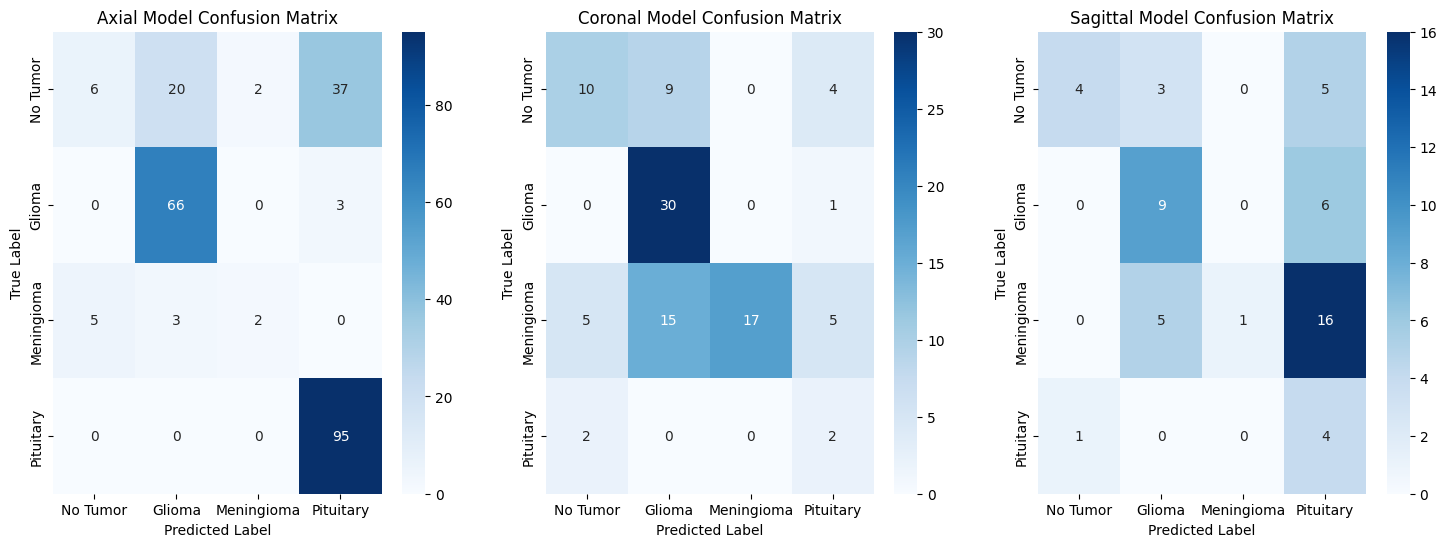

In [ ]:
# @title Confusion Matrixes
# Confusion matrixes
from sklearn.metrics import confusion_matrix
# Axial Model
axial_predictions = AXModel.predict(axial_X_test)
axial_predicted_classes = np.argmax(axial_predictions, axis=1)
axial_cm = confusion_matrix(axial_y_test, axial_predicted_classes)

# Coronal Model
coronal_predictions = CORModel.predict(coronal_X_test)
coronal_predicted_classes = np.argmax(coronal_predictions, axis=1)
coronal_cm = confusion_matrix(coronal_y_test, coronal_predicted_classes)

# Sagittal Model
sagittal_predictions = SAGModel.predict(sagittal_X_test)
sagittal_predicted_classes = np.argmax(sagittal_predictions, axis=1)
sagittal_cm = confusion_matrix(sagittal_y_test, sagittal_predicted_classes)

# Visualize
plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.heatmap(axial_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'],
            yticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Axial Model Confusion Matrix')

plt.subplot(132)
sns.heatmap(coronal_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'],
            yticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Coronal Model Confusion Matrix')

plt.subplot(133)
sns.heatmap(sagittal_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'],
            yticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Sagittal Model Confusion Matrix')

plt.show()

In [ ]:
# @title Recall / Precision
from sklearn.metrics import classification_report
print("AXIAL\n")
print(classification_report(axial_y_test, axial_predicted_classes))

print("CORONAL\n")
print(classification_report(coronal_y_test, coronal_predicted_classes))

print("SAGITTAL\n")
print(classification_report(sagittal_y_test, sagittal_predicted_classes))





AXIAL

              precision    recall  f1-score   support

           0       0.55      0.09      0.16        65
           1       0.74      0.96      0.84        69
           2       0.50      0.20      0.29        10
           3       0.70      1.00      0.83        95

    accuracy                           0.71       239
   macro avg       0.62      0.56      0.53       239
weighted avg       0.66      0.71      0.62       239

CORONAL

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        23
           1       0.56      0.97      0.71        31
           2       1.00      0.40      0.58        42
           3       0.17      0.50      0.25         4

    accuracy                           0.59       100
   macro avg       0.58      0.58      0.51       100
weighted avg       0.73      0.59      0.59       100

SAGITTAL

              precision    recall  f1-score   support

           0       0.80      0.33      0.47      

2/2 [==============================] - 0s 157ms/step


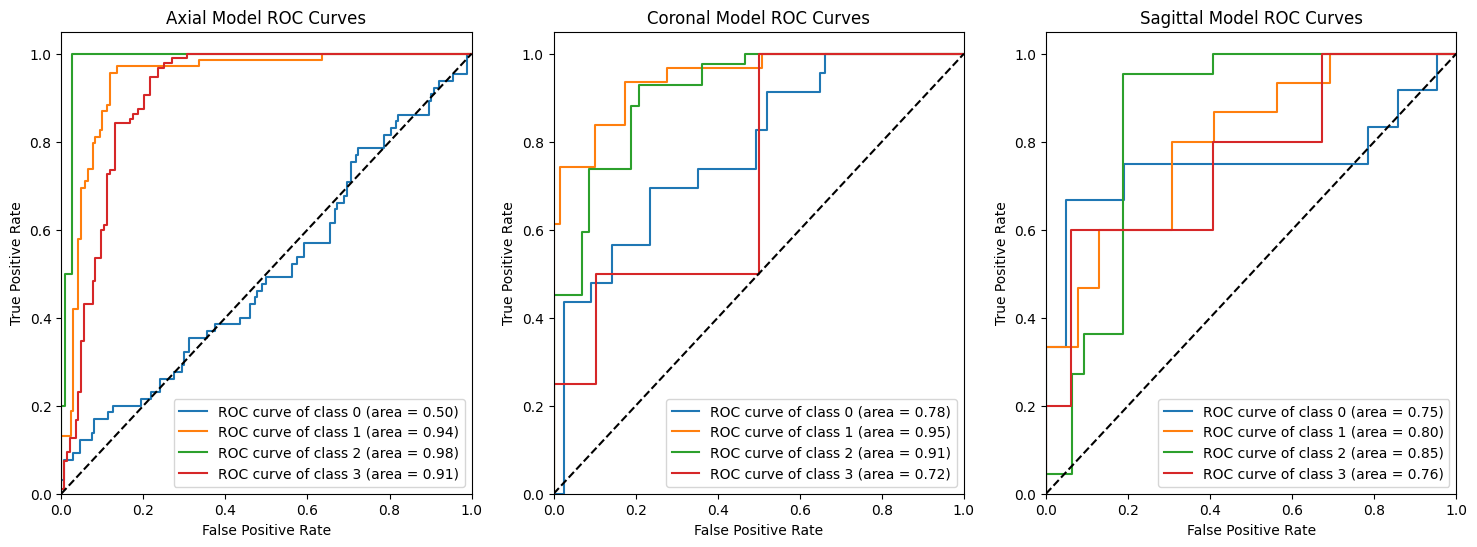

In [ ]:
# @title ROC/AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
axial_y_test_bin = label_binarize(axial_y_test, classes=[0, 1, 2, 3])
coronal_y_test_bin = label_binarize(coronal_y_test, classes=[0, 1, 2, 3])
sagittal_y_test_bin = label_binarize(sagittal_y_test, classes=[0, 1, 2, 3])
n_classes = axial_y_test_bin.shape[1]

# Get probabilities for each class
axial_y_score = AXModel.predict(axial_X_test)
coronal_y_score = CORModel.predict(coronal_X_test)
sagittal_y_score = SAGModel.predict(sagittal_X_test)

axial_fpr = dict()
axial_tpr = dict()
axial_roc_auc = dict()
coronal_fpr = dict()
coronal_tpr = dict()
coronal_roc_auc = dict()
sagittal_fpr = dict()
sagittal_tpr = dict()
sagittal_roc_auc = dict()

for i in range(n_classes):
    axial_fpr[i], axial_tpr[i], _ = roc_curve(axial_y_test_bin[:, i], axial_y_score[:, i])
    axial_roc_auc[i] = auc(axial_fpr[i], axial_tpr[i])

    coronal_fpr[i], coronal_tpr[i], _ = roc_curve(coronal_y_test_bin[:, i], coronal_y_score[:, i])
    coronal_roc_auc[i] = auc(coronal_fpr[i], coronal_tpr[i])

    sagittal_fpr[i], sagittal_tpr[i], _ = roc_curve(sagittal_y_test_bin[:, i], sagittal_y_score[:, i])
    sagittal_roc_auc[i] = auc(sagittal_fpr[i], sagittal_tpr[i])

# Plot ROC curves
plt.figure(figsize=(18, 6))

# Axial Model
plt.subplot(131)
for i in range(n_classes):
    plt.plot(axial_fpr[i], axial_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                            ''.format(i, axial_roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Axial Model ROC Curves')
plt.legend(loc="lower right")

# Coronal Model
plt.subplot(132)
for i in range(n_classes):
    plt.plot(coronal_fpr[i], coronal_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                            ''.format(i, coronal_roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Coronal Model ROC Curves')
plt.legend(loc="lower right")

# Sagittal Model
plt.subplot(133)
for i in range(n_classes):
    plt.plot(sagittal_fpr[i], sagittal_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                            ''.format(i, sagittal_roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sagittal Model ROC Curves')
plt.legend(loc="lower right")

plt.show()


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X_train = []
y_train = []
image_size = (150, 150)

for label in labels:
  folderPath = os.path.join(r'/content/Brain-Tumor-Classification', 'Training', label)
  for image in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath, image))
    img = cv2.resize(img, image_size)
    X_train.append(img)
    y_train.append(label)

for label in labels:
  folderPath = os.path.join(r'/content/Brain-Tumor-Classification', 'Testing', label)
  for image in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath, image))
    img = cv2.resize(img, image_size)
    X_train.append(img)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(3264, 150, 150, 3)
(3264,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1, random_state=101)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/12
83/83 [==============================] - 124s 358ms/step - loss: 0.5336 - accuracy: 0.8260 - val_loss: 14.0373 - val_accuracy: 0.4354
Epoch 2/12
83/83 [==============================] - 20s 242ms/step - loss: 0.2075 - accuracy: 0.9357 - val_loss: 0.6795 - val_accuracy: 0.8503
Epoch 3/12
83/83 [==============================] - 20s 247ms/step - loss: 0.1754 - accuracy: 0.9425 - val_loss: 0.1794 - val_accuracy: 0.9388
Epoch 4/12
83/83 [==============================] - 21s 251ms/step - loss: 0.0903 - accuracy: 0.9678 - val_loss: 0.4719 - val_accuracy: 0.8571
Epoch 5/12
83/83 [==============================] - 21s 251ms/step - loss: 0.0982 - accuracy: 0.9686 - val_loss: 0.1858 - val_accuracy: 0.9354
Epoch 6/12
83/83 [==============================] - 21s 257ms/step - loss: 0.0567 - accuracy: 0.9803 - val_loss: 0.9515 - val_accuracy: 0.8095
Epoch 7/12
83/83 [==============================] - 21s 249ms/step - loss

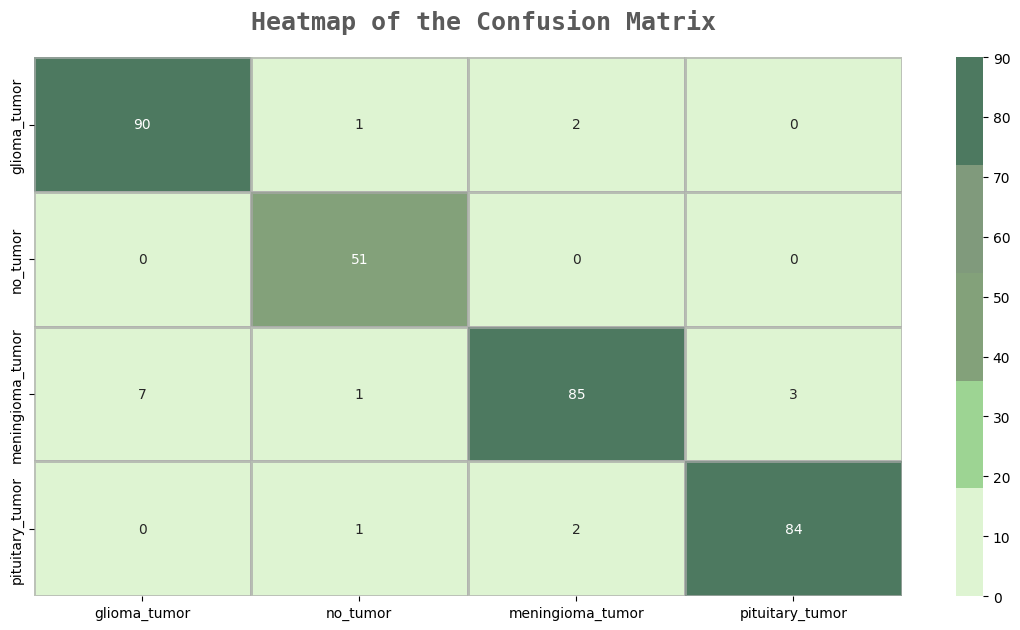

11/11 [==============================] - 1s 66ms/step


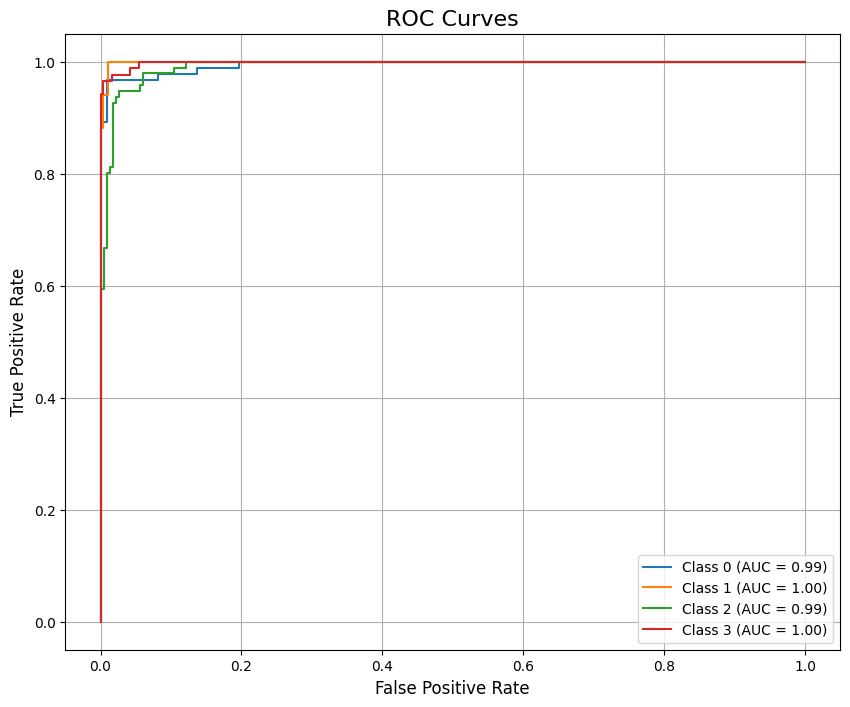

In [ ]:
# @title InceptionResNetV2 Model
from tensorflow.keras.applications import InceptionResNetV2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

resnet = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_pred_proba = model.predict(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fig, ax = plt.subplots(figsize=(10, 8))
for i in range(4):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i]).plot(ax=ax, name=f"Class {i}")

ax.set_title('ROC Curves', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
plt.show()

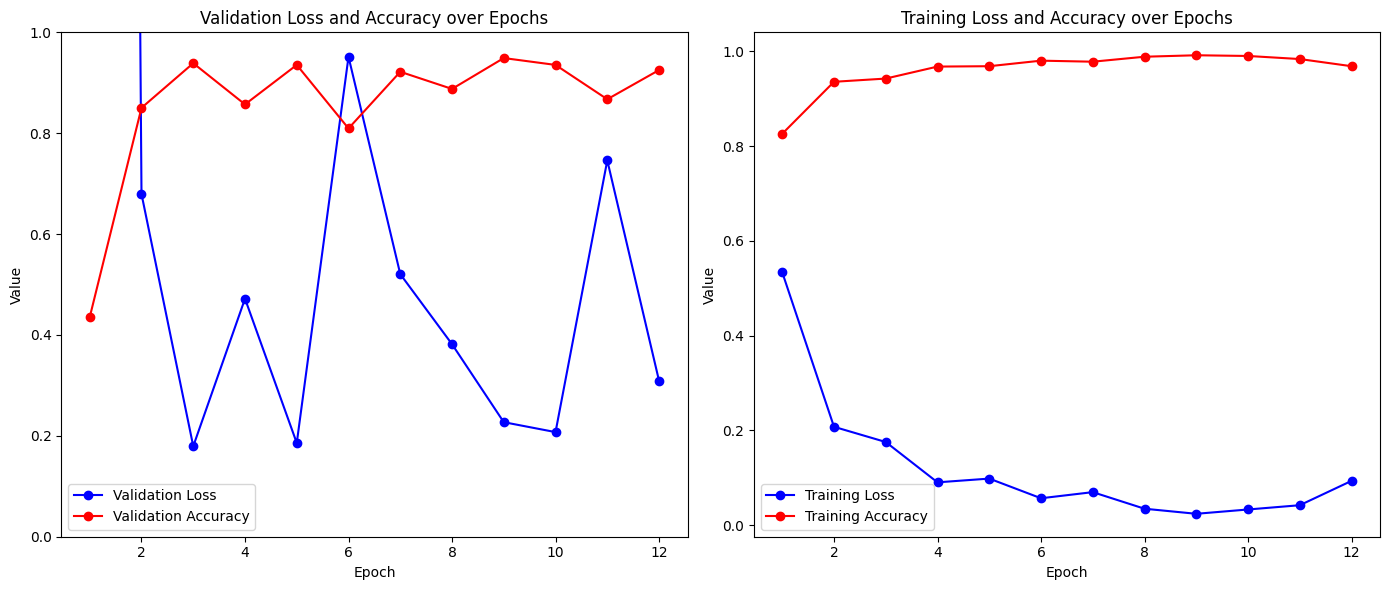

In [ ]:
val_loss = [14.0373, 0.6795, 0.1794, 0.4719, 0.1858, 0.9515, 0.5206, 0.3817, 0.2271, 0.2074, 0.7461, 0.3092]
val_accuracy = [0.4354, 0.8503, 0.9388, 0.8571, 0.9354, 0.8095, 0.9218, 0.8878, 0.9490, 0.9354, 0.8673, 0.9252]
train_loss = [0.5336, 0.2075, 0.1754, 0.0903, 0.0982, 0.0567, 0.0696, 0.0346, 0.0239, 0.0330, 0.0420, 0.0934]
train_accuracy = [0.8260, 0.9357, 0.9425, 0.9678, 0.9686, 0.9803, 0.9781, 0.9886, 0.9917, 0.9902, 0.9837, 0.9686]

epochs = list(range(1, 13))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(epochs, val_loss, 'bo-', label='Validation Loss')
ax1.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax1.set_title('Validation Loss and Accuracy over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
ax1.legend()
ax1.set_ylim(0, 1)

ax2.plot(epochs, train_loss, 'bo-', label='Training Loss')
ax2.plot(epochs, train_accuracy, 'ro-', label='Training Accuracy')
ax2.set_title('Training Loss and Accuracy over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Value')
ax2.legend()

plt.tight_layout()
plt.show()


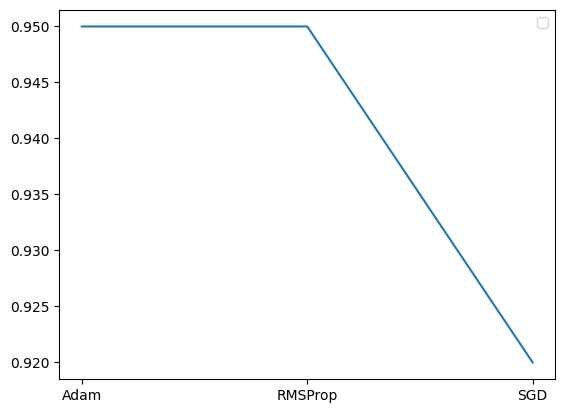

In [ ]:
plt.plot(['Adam', 'RMSProp', 'SGD'], [.95, .95, .92])
plt.legend()
plt.show()

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
testing_base_path = r'/content/drive/MyDrive/Scan_Classification_testing_copy/Testing'
training_base_path = r'/content/drive/MyDrive/Scan_Classification_testing_copy/Training'


img_size = (150, 150)

axial_image = np.array((cv2.imread('/content/drive/MyDrive/Axial/Testing/glioma_tumor/image(100).jpg'))) / 255.0
coronal_image = np.array((cv2.imread('/content/drive/MyDrive/Coronal/Testing/glioma_tumor/image(1).jpg'))) / 255.0
sagittal_image = np.array((cv2.imread('/content/drive/MyDrive/Sagittal/Testing/glioma_tumor/image(10).jpg'))) / 255.0

axial_image = cv2.resize(axial_image, img_size)
coronal_image = cv2.resize(coronal_image, img_size)
sagittal_image = cv2.resize(sagittal_image, img_size)

Text(0.5, 1.0, 'Sagittal')

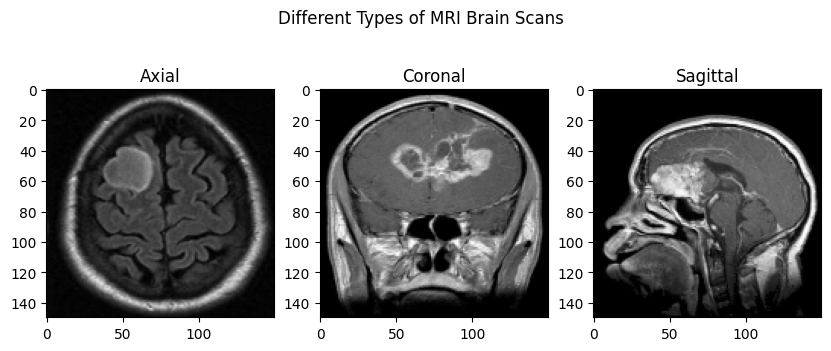

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle('Different Types of MRI Brain Scans')
axs[0].imshow(axial_image)
axs[0].set_title('Axial')
axs[1].imshow(coronal_image)
axs[1].set_title('Coronal')
axs[2].imshow(sagittal_image)
axs[2].set_title('Sagittal')

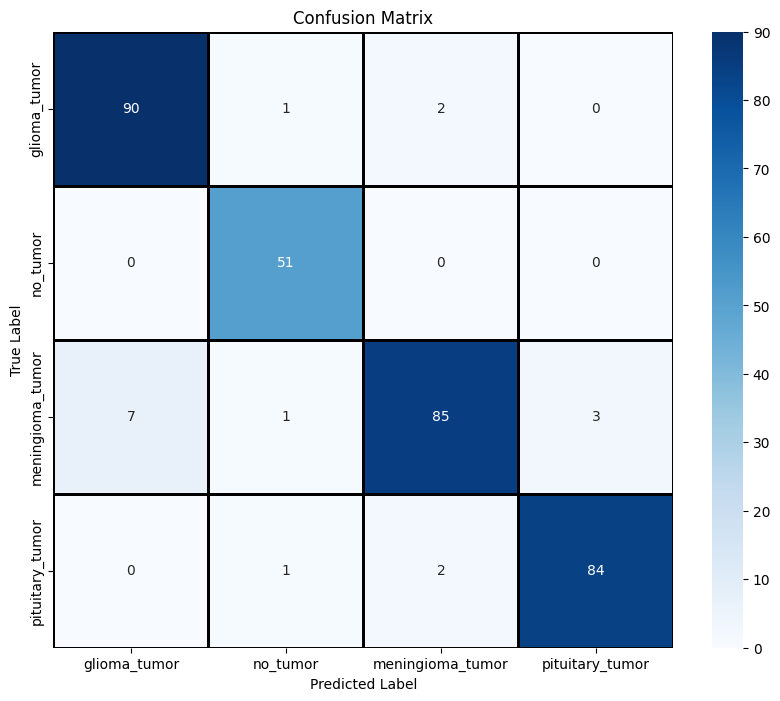

In [ ]:
confusion_matrix = np.array([[90, 1, 2, 0],
                        [0, 51, 0, 0],
                        [7, 1, 85, 3],
                        [0, 1, 2, 84]])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor'],
            yticklabels=['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor'],
            linewidths=2, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

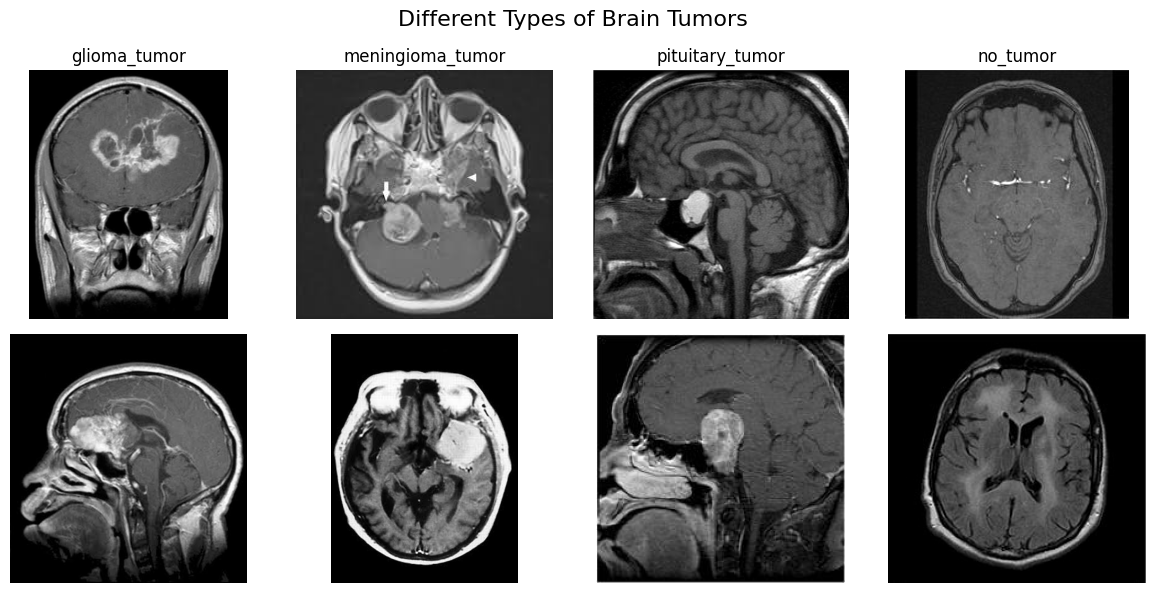

In [ ]:
base_path = '/content/Brain-Tumor-Classification/Testing'

tumor_data = {
    'glioma_tumor': ['image(1).jpg', 'image(10).jpg'],
    'meningioma_tumor': ['image(100).jpg', 'image(107).jpg'],
    'pituitary_tumor': ['image(41).jpg', 'image(63).jpg'],
    'no_tumor': ['image(20).jpg', 'image(26).jpg']
}

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, (tumor_type, filenames) in enumerate(tumor_data.items()):
    for j, filename in enumerate(filenames):
        image_path = os.path.join(base_path, tumor_type, filename)
        image = plt.imread(image_path)
        axes[j, i].imshow(image)
        axes[j, i].axis('off')
        if j == 0:
            axes[j, i].set_title(tumor_type)

fig.suptitle('Different Types of Brain Tumors', fontsize=16)

plt.tight_layout()
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171625 to fit



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


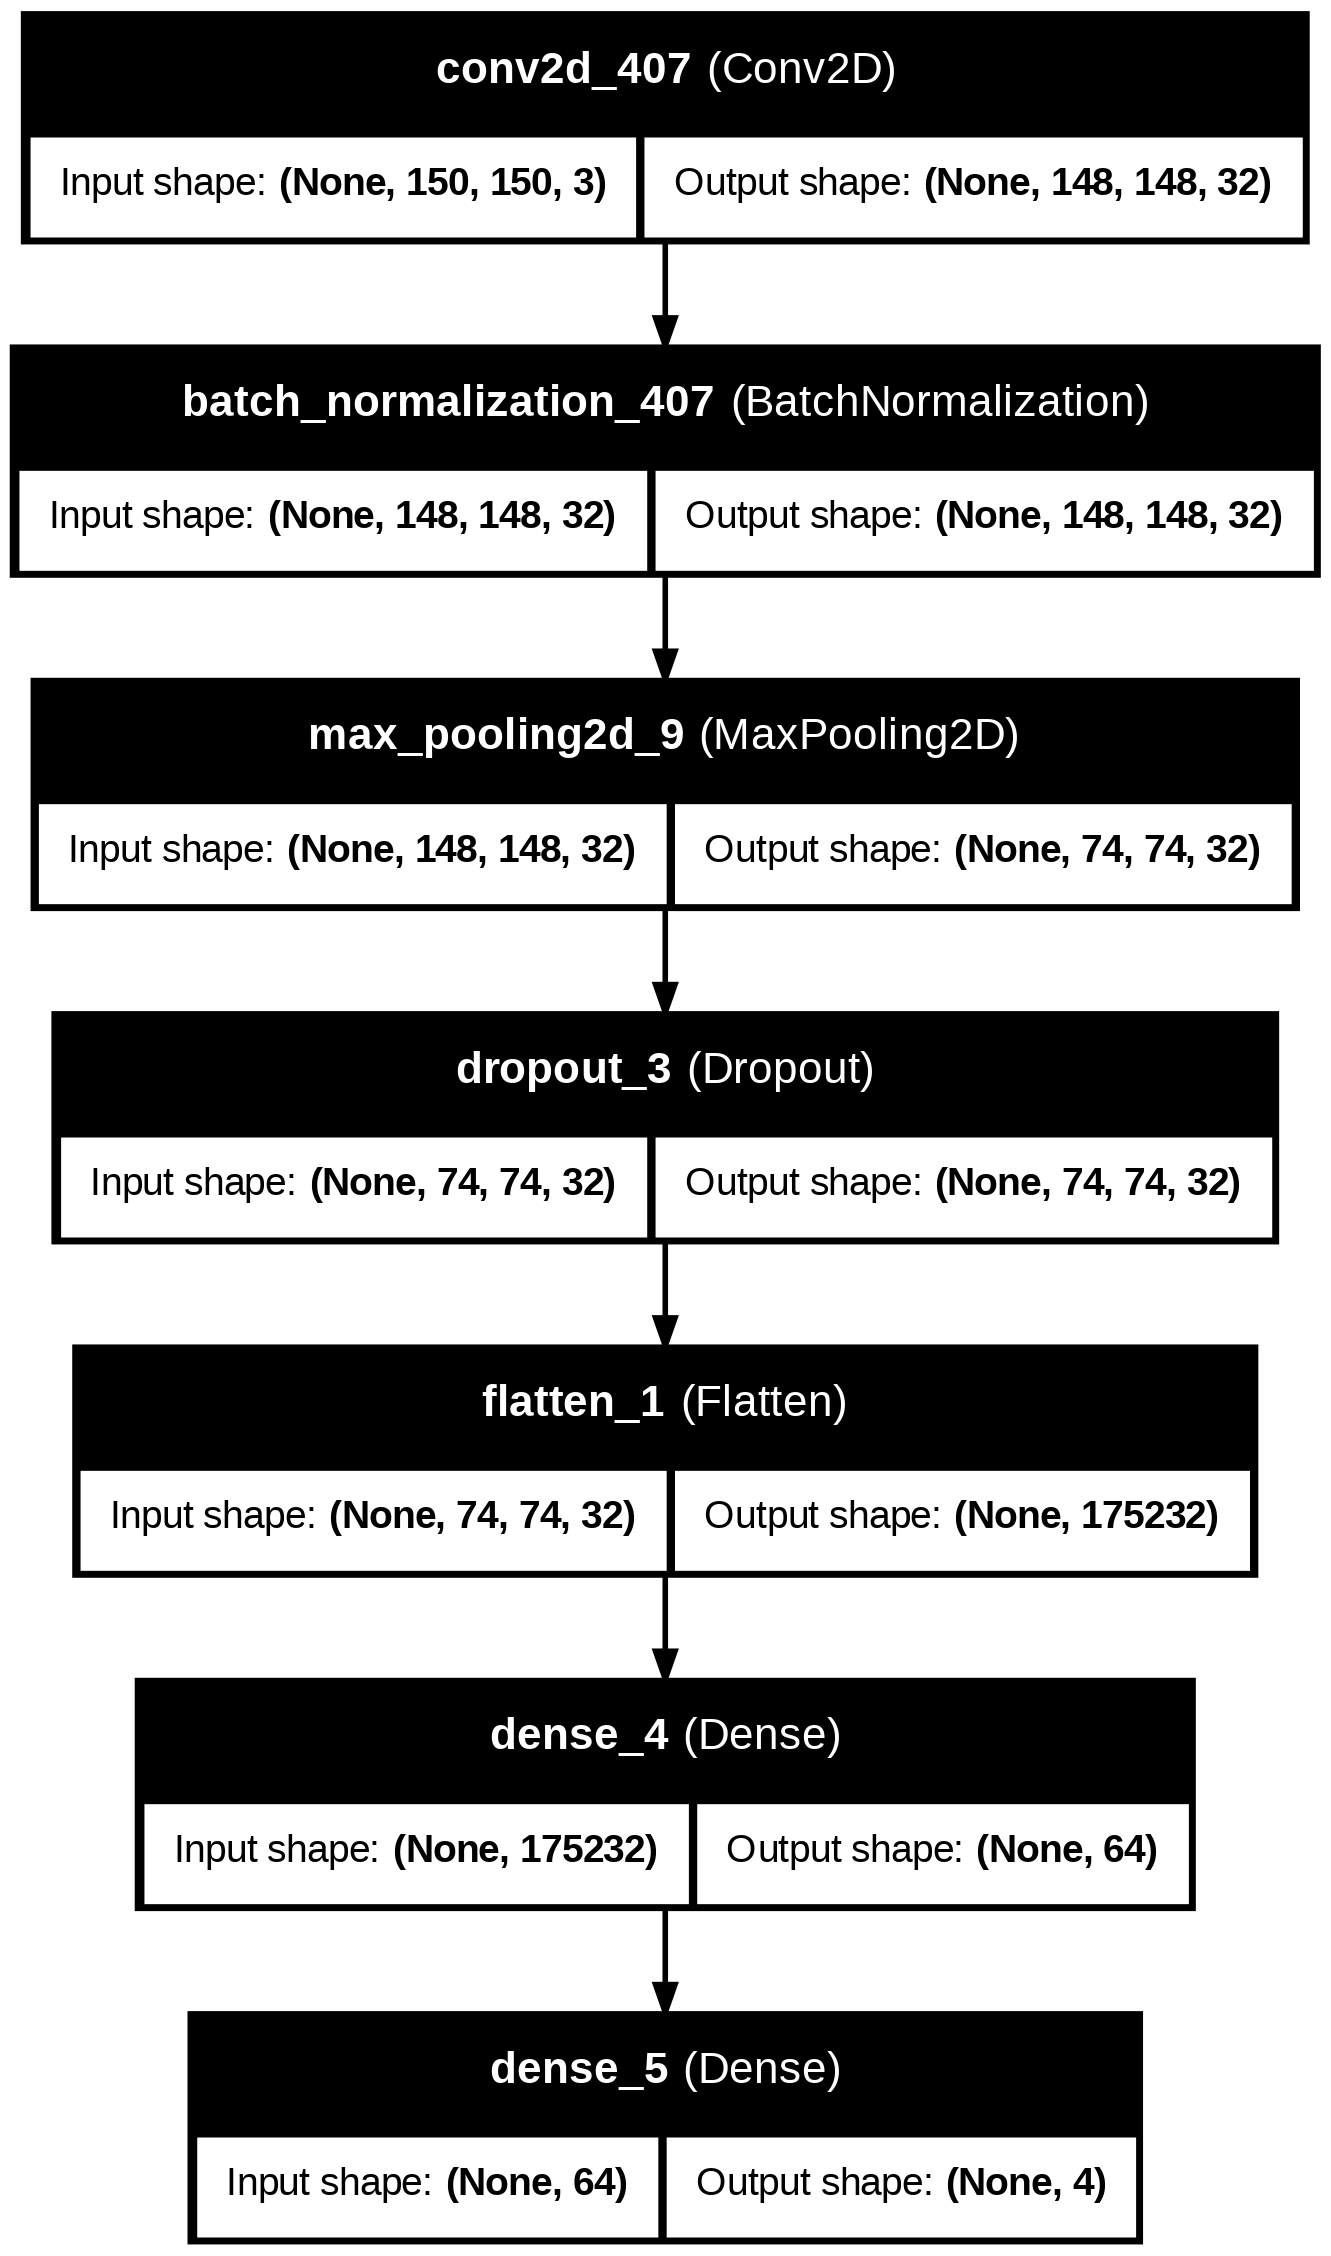

In [ ]:
!pip install pydot graphviz
from tensorflow.keras.applications import InceptionResNetV2
import tensorflow as tf
from tensorflow.keras.utils import plot_model

resnet = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model_output = resnet.output
model_output = tf.keras.layers.GlobalAveragePooling2D()(model_output)
model_output = tf.keras.layers.Dropout(rate=0.5)(model_output)
model_output = tf.keras.layers.Dense(4, activation='softmax')(model_output)
model = tf.keras.models.Model(inputs=resnet.input, outputs=model_output)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model

AXModel = Sequential()
AXModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
AXModel.add(BatchNormalization())
AXModel.add(MaxPooling2D((2, 2)))
AXModel.add(Dropout(0.25))
AXModel.add(Flatten())
AXModel.add(Dense(64, activation='relu'))
AXModel.add(Dense(4, activation='softmax'))

AXModel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

plot_model(AXModel, to_file='model2.png', show_shapes=True, show_layer_names=True)



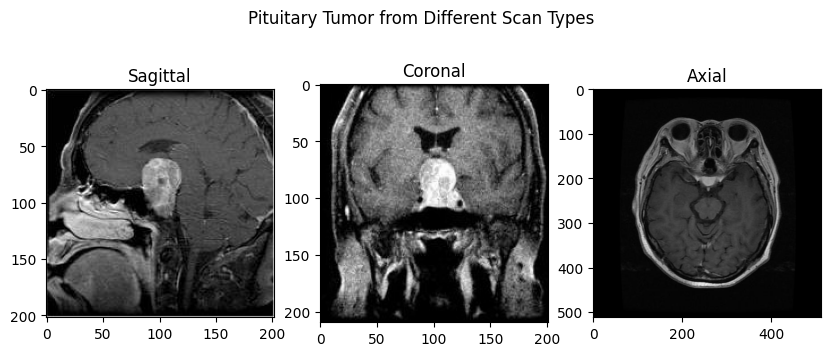

In [ ]:
# sagittal - /content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(63).jpg
# coronal - /content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(35).jpg
# axial -   /content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(73).jpg

sagimg = mpimg.imread('/content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(63).jpg')
corimg = mpimg.imread('/content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(35).jpg')
aximg = mpimg.imread('/content/Brain-Tumor-Classification/Testing/pituitary_tumor/image(73).jpg')

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle('Pituitary Tumor from Different Scan Types')
axs[0].imshow(sagimg)
axs[0].set_title('Sagittal')
axs[1].imshow(corimg)
axs[1].set_title('Coronal')
axs[2].imshow(aximg)
axs[2].set_title('Axial')

plt.show()